1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Determine the cluster number
    3. a. Use elbow method as baseline
    3. b. Apply other methods to compare with elbow
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable clustering model for this problem.
5. Visualize your cluster in 2D or 3D to compare the result.
6. Measure performance of your clustering model.
7. Conclusion and Discussion (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

| Biến                        | Mô tả                                                                 |
|-----------------------------|----------------------------------------------------------------------|
| `BALANCE`                   | Số dư còn lại trong tài khoản để thực hiện mua sắm                  |
| `BALANCE_FREQUENCY`         | Tần suất cập nhật số dư, giá trị từ 0 đến 1 (1 = cập nhật thường xuyên) |
| `PURCHASES`                 | Tổng số tiền đã mua sắm từ tài khoản                                |
| `ONEOFF_PURCHASES`          | Giá trị lớn nhất của một lần mua hàng đơn lẻ                        |
| `INSTALLMENTS_PURCHASES`    | Tổng giá trị mua hàng theo hình thức trả góp                        |
| `CASH_ADVANCE`              | Số tiền mặt được ứng trước bởi người dùng                           |
| `PURCHASES_FREQUENCY`       | Tần suất thực hiện các giao dịch mua sắm (0 đến 1)                  |
| `ONEOFF_PURCHASES_FREQUENCY`| Tần suất thực hiện các giao dịch mua đơn lẻ (0 đến 1)               |
| `PURCHASES_INSTALLMENTS_FREQUENCY` | Tần suất mua hàng trả góp (0 đến 1)                          |
| `CASH_ADVANCE_FREQUENCY`    | Tần suất ứng trước tiền mặt (0 đến 1)                               |
| `CASH_ADVANCE_TRX`          | Số lượng giao dịch ứng trước tiền mặt                               |
| `PURCHASES_TRX`             | Số lượng giao dịch mua hàng                                         |
| `CREDIT_LIMIT`              | Hạn mức tín dụng của thẻ đối với người dùng                         |
| `PAYMENTS`                  | Tổng số tiền người dùng đã thanh toán                               |
| `MINIMUM_PAYMENTS`          | Khoản thanh toán tối thiểu người dùng đã trả                        |
| `PRC_FULL_PAYMENT`          | Tỷ lệ phần trăm thanh toán toàn bộ nợ                              |
| `TENURE`                    | Thời gian sử dụng thẻ tín dụng của người dùng                       |


**Chỉ dùng các features trên để phân cụm**

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Clustered_Customer_Data.csv")

In [4]:
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [5]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Data Analysis

In [6]:
# Kiểm tra thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [7]:
# Kiểm tra dữ liệu khuyết
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Cluster                             0
dtype: int64

In [8]:
# Kiểm tra dữ liệu trùng lặp
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe().round(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00
mean,1564.47,0.88,1003.20,592.44,411.07,978.87,0.49,0.20,0.36,0.14,3.25,14.71,4494.45,1733.14,864.21,0.15,11.52,1.44
std,2081.53,0.24,2136.63,1659.89,904.34,2097.16,0.40,0.30,0.40,0.20,6.82,24.86,3638.61,2895.06,2330.59,0.29,1.34,1.37
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.02,0.00,6.00,0.00
25%,128.28,0.89,39.64,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,1.00,1600.00,383.28,170.86,0.00,12.00,0.00
50%,873.39,1.00,361.28,38.00,89.00,0.00,0.50,0.08,0.17,0.00,0.00,7.00,3000.00,856.90,335.63,0.00,12.00,2.00
75%,2054.14,1.00,1110.13,577.40,468.64,1113.82,0.92,0.30,0.75,0.22,4.00,17.00,6500.00,1901.13,864.21,0.14,12.00,3.00
max,19043.14,1.00,49039.57,40761.25,22500.00,47137.21,1.00,1.00,1.00,1.50,123.00,358.00,30000.00,50721.48,76406.21,1.00,12.00,3.00


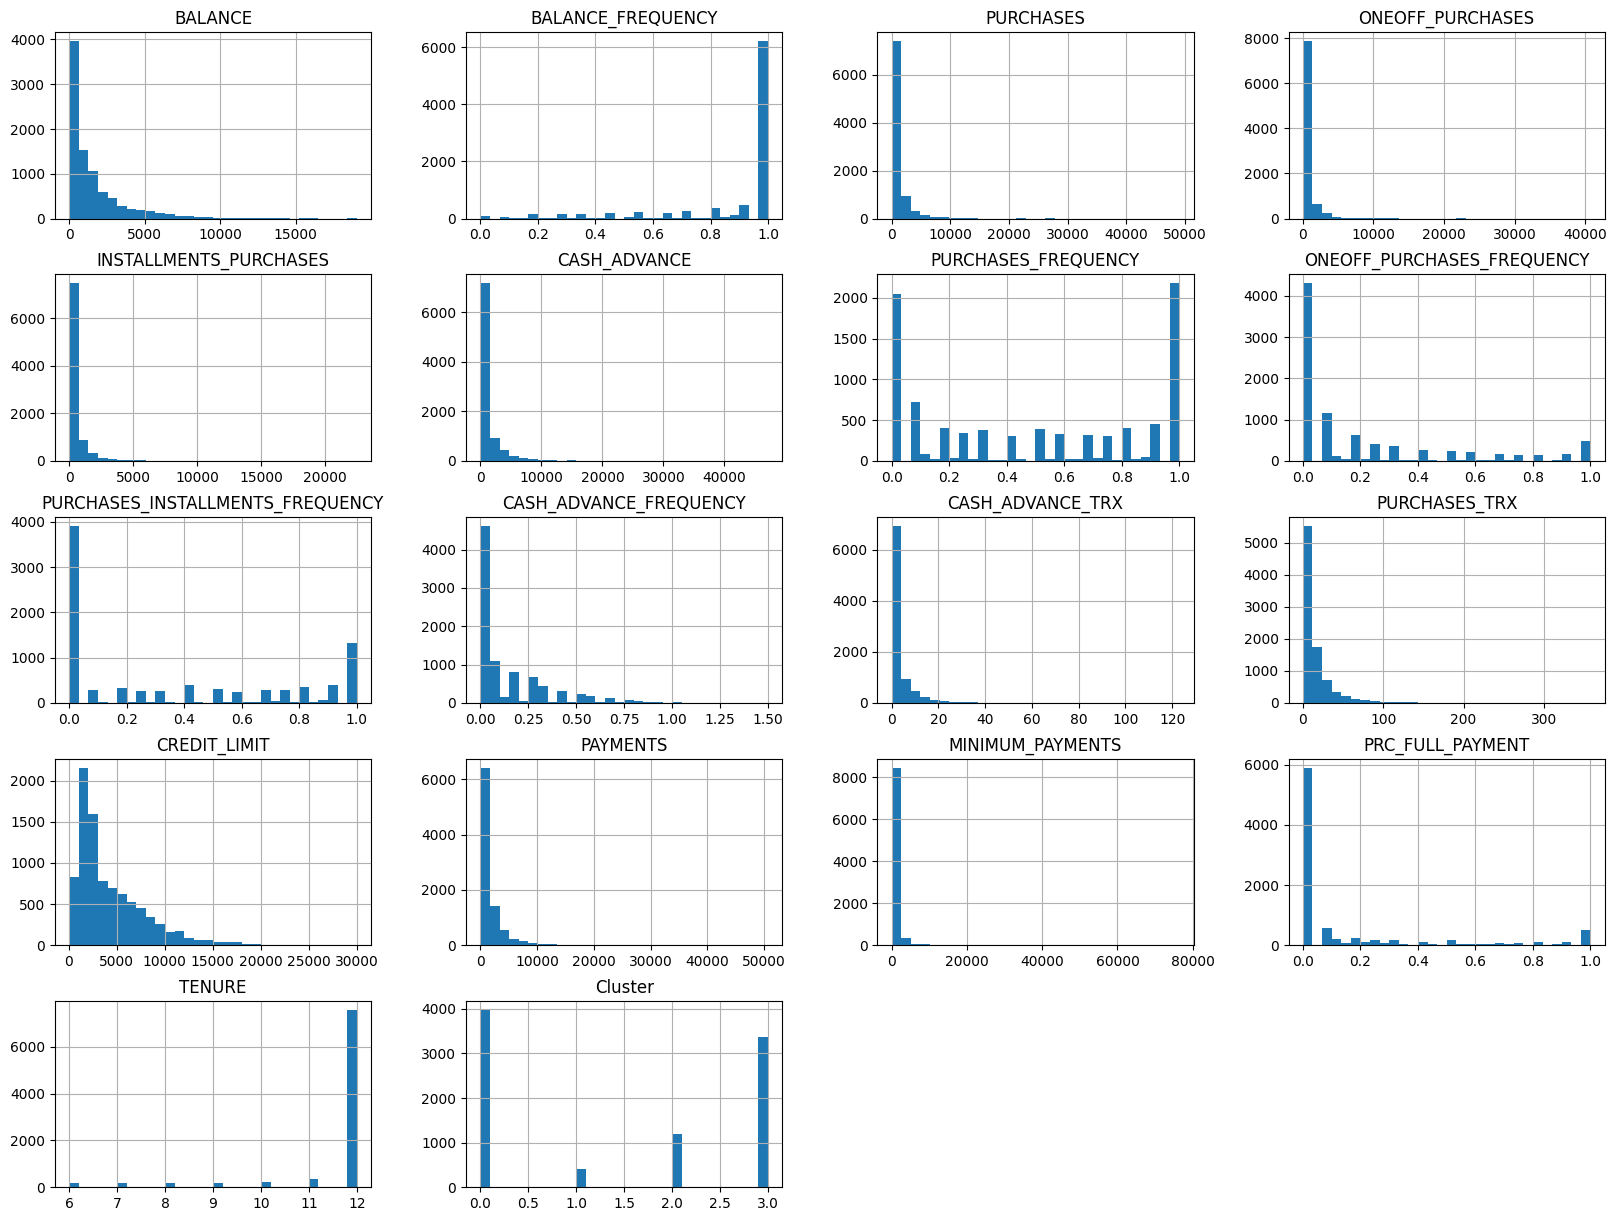

In [10]:
df.hist(figsize=(20, 15), bins=30)
plt.show()

In [11]:
cluster_summary = df.groupby('Cluster')[[
    'BALANCE',
    'PURCHASES',
    'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE',
    'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY'
]].mean().round(2)

print(cluster_summary)

         BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
Cluster                                                                 
0        1011.75     269.97            209.85                   60.39   
1        3551.15    7681.62           5095.88                 2587.21   
2        4602.46     501.90            320.37                  181.61   
3         894.91    1236.18            593.97                  642.48   

         CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
Cluster                                                                  
0              595.76                 0.17                        0.09   
1              653.64                 0.95                        0.74   
2             4520.72                 0.29                        0.14   
3              210.57                 0.89                        0.30   

         CASH_ADVANCE_FREQUENCY  
Cluster                          
0                          0.11  
1             

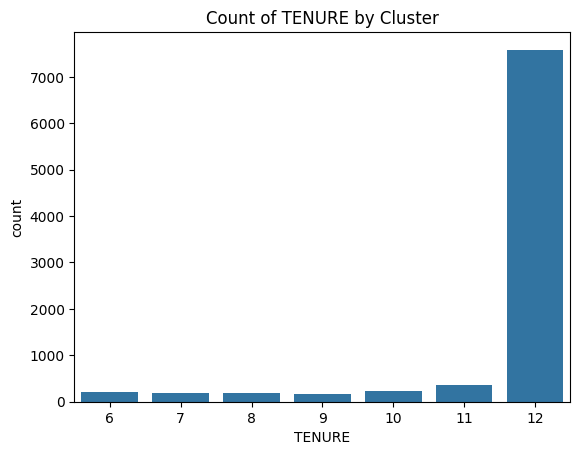

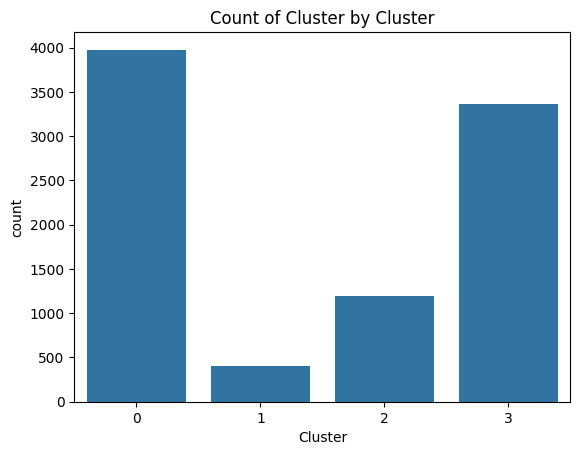

In [12]:
for col in ['TENURE', 'Cluster']:
    plt.figure()
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col} by Cluster')
    plt.show()

# Data Preprocessing

In [13]:
# Replace outlier with median each cluster
def handle_outliers(df, feature):
    for cluster in df['Cluster'].unique():
        cluster_data = df[df['Cluster'] == cluster]
        median_value = cluster_data[feature].median()
        std_value = cluster_data[feature].std()
        threshold = 3 * std_value
        outliers = (cluster_data[feature] < (median_value - threshold)) | (cluster_data[feature] > (median_value + threshold))
        df.loc[(df['Cluster'] == cluster) & outliers, feature] = median_value
    return df

In [14]:
cleaned_df = df.copy()
for col in cleaned_df.columns:
    cleaned_df = handle_outliers(cleaned_df, col)
# Kiểm tra lại dữ liệu sau khi loại bỏ outliers
print("Data shape after removing outliers:", cleaned_df.shape)

Data shape after removing outliers: (8950, 18)


C:\Users\Admin\AppData\Local\Temp\ipykernel_13304\395780001.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '11.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Cluster'] == cluster) & outliers, feature] = median_value


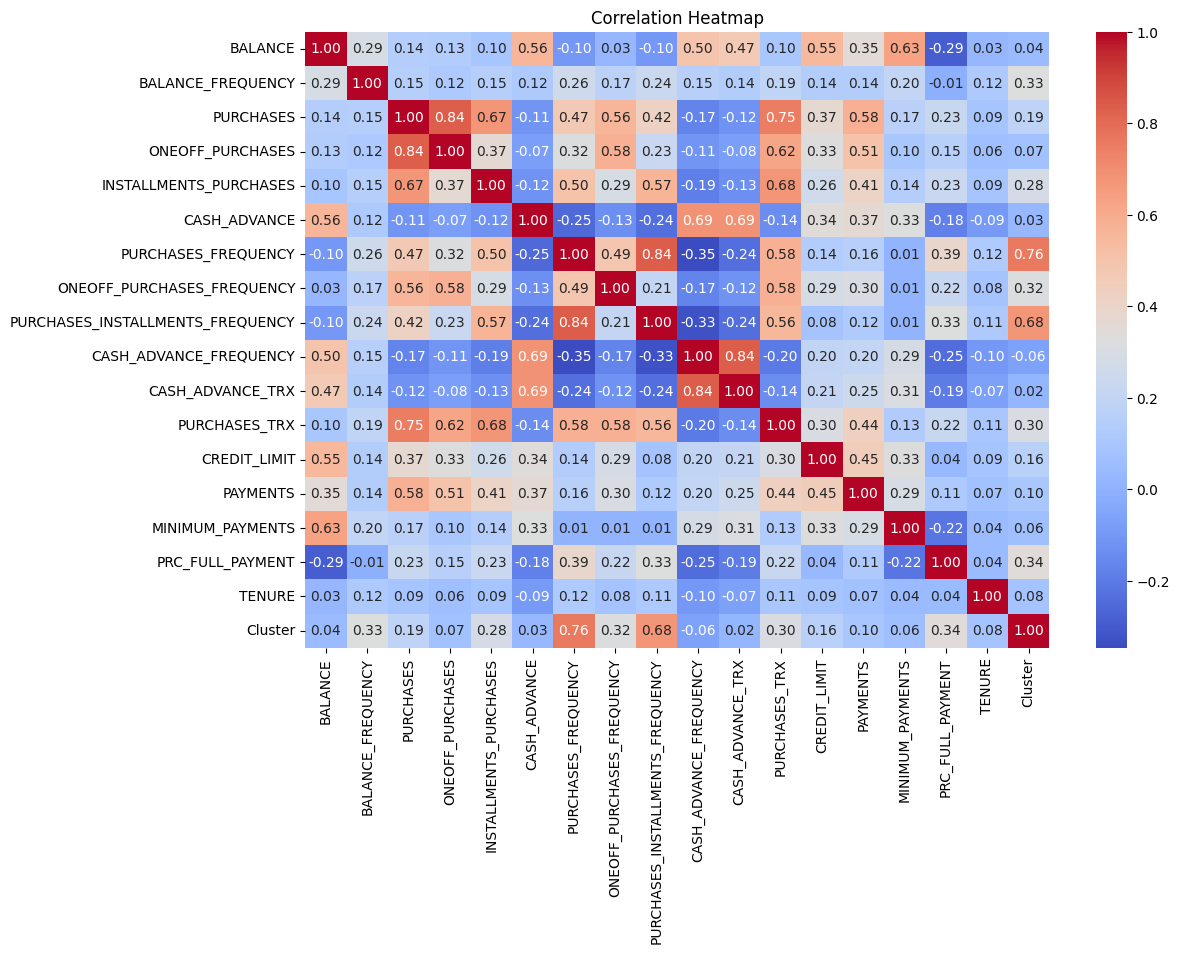

In [15]:
# Plot heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(cleaned_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering

In [16]:
# Add log1p transformed features
cols_to_transform = ['PURCHASES', 'CASH_ADVANCE', 'BALANCE', 'PAYMENTS']

for col in cols_to_transform:
    cleaned_df[f"{col}_LOG"] = np.log1p(cleaned_df[col])

In [17]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cleaned_df = cleaned_df.drop(columns=['Cluster'], errors='ignore')
scaled_data = scaler.fit_transform(cleaned_df)

# Model Part

In [18]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

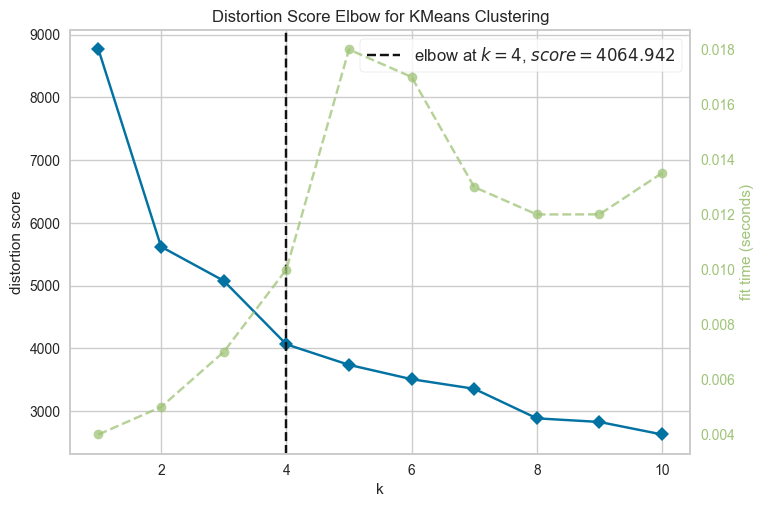

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
# Use elbow method as baseline
elbow_method = KElbowVisualizer(KMeans(), k=(1,11))
elbow_method.fit(scaled_data)
elbow_method.show()

In [ ]:
# Initialize clustering models (choose k = 4 based on elbow method)
# Kmeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)

# GaussianMixture clustering
gmm = GaussianMixture(n_components=4, random_state=42)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.9, min_samples=5)

# Agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=4)

In [21]:
# Apply KMeans clustering
kmeans_labels = kmeans.fit_predict(scaled_data)
silhouette_kmeans = silhouette_score(scaled_data, kmeans_labels)

# Apply DBSCAN clustering
dbscan_labels = dbscan.fit_predict(scaled_data)
silhouette_dbscan = silhouette_score(scaled_data, dbscan_labels)

print(f'Silhouette Score for KMeans: {silhouette_kmeans}')
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")

Silhouette Score for KMeans: 0.27375081118199696
Silhouette Score for DBSCAN: 0.3874333950134743


In [22]:
# 4. Use Pipeline
# 4. a. Use scaler and dimensional reduction
# Create a pipeline for 3D clustering
pipeline_3D = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=3)),
    ('kmeans', kmeans)
])

# Fit predict the clusters
predicted_clusters_3D = pipeline_3D.fit_predict(cleaned_df)
# Transform the data to 3D PCA features
pca_features_3D = pipeline_3D.named_steps['pca'].transform(pipeline_3D.named_steps['scaler'].transform(cleaned_df))
# Print score
silhouette_3D = silhouette_score(pca_features_3D, predicted_clusters_3D)
print(f'Silhouette Score for 3D KMeans: {silhouette_3D}')

Silhouette Score for 3D KMeans: 0.43020808219367923


In [23]:
# Compare clustering models using dimensionality reduction
preprocess_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=3))
])

pca_features_3D = preprocess_pipeline.fit_transform(cleaned_df)

# KMeans
kmeans_labels_3D = kmeans.fit_predict(pca_features_3D)
kmeans_score_3D = silhouette_score(pca_features_3D, kmeans_labels_3D)

# GMM
gmm_labels_3D = gmm.fit_predict(pca_features_3D)
gmm_score_3D = silhouette_score(pca_features_3D, gmm_labels_3D)

# Agglomerative
agg_labels_3D = agglo.fit_predict(pca_features_3D)
agg_score_3D = silhouette_score(pca_features_3D, agg_labels_3D)

print(f"Silhouette Score (KMeans):{kmeans_score_3D}")
print(f"Silhouette Score (GaussianMixture):{gmm_score_3D}")
print(f"Silhouette Score (Agglomerative):{agg_score_3D}")

Silhouette Score (KMeans):0.43020808219367923
Silhouette Score (GaussianMixture):0.361733255640822
Silhouette Score (Agglomerative):0.38533291047076074


In [24]:
# 4. b. Suitable clustering model for this problem without dimensional reduction
# Define models to compare
models = {
    'KMeans': kmeans,
    'GMM': gmm,
    'Agglomerative': agglo,
    'DBSCAN': dbscan
}

scores = {}
for model_name, model in models.items():
    # Fit the model
    labels = model.fit_predict(scaled_data)
    # Calculate silhouette score
    if len(set(labels)) > 1:  # Ensure at least 2 clusters
        score = silhouette_score(scaled_data, labels)
    else:
        score = -1  # Invalid score for single cluster
    scores[model_name] = score

# Print results and select best
df_scores = pd.DataFrame.from_dict(scores, orient='index', columns=['Silhouette']).sort_values(by='Silhouette', ascending=False)
print(df_scores)
best_model_name = df_scores.index[0]
best_model = models[best_model_name]
print(f"Best model: {best_model_name} (Silhouette = {df_scores.iloc[0][0]:.3f})")

# Fit and assign best clusters to dataframe
df['PredictedCluster'] = best_model.fit_predict(scaled_data)

               Silhouette
DBSCAN           0.387433
KMeans           0.273751
Agglomerative    0.242482
GMM              0.162203
Best model: DBSCAN (Silhouette = 0.387)


C:\Users\Admin\AppData\Local\Temp\ipykernel_13304\3068469783.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Best model: {best_model_name} (Silhouette = {df_scores.iloc[0][0]:.3f})")


In [25]:
# 4. b. Create a pipeline for 2D clustering
# Compare clustering models using dimensionality reduction
preprocess_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=2))
])

pca_features_2D = preprocess_pipeline.fit_transform(cleaned_df)

# KMeans
kmeans_labels_2D = kmeans.fit_predict(pca_features_2D)
kmeans_score_2D = silhouette_score(pca_features_2D, kmeans_labels_2D)

# GMM
gmm_labels_2D = gmm.fit_predict(pca_features_2D)
gmm_score_2D = silhouette_score(pca_features_2D, gmm_labels_2D)

# Agglomerative
agg_labels_2D = agglo.fit_predict(pca_features_2D)
agg_score_2D = silhouette_score(pca_features_2D, agg_labels_2D)

print(f"Silhouette Score (KMeans):{kmeans_score_2D}")
print(f"Silhouette Score (GaussianMixture):{gmm_score_2D}")
print(f"Silhouette Score (Agglomerative):{agg_score_2D}")

Silhouette Score (KMeans):0.4996228766938204
Silhouette Score (GaussianMixture):0.40774689156085336
Silhouette Score (Agglomerative):0.4839090476006732


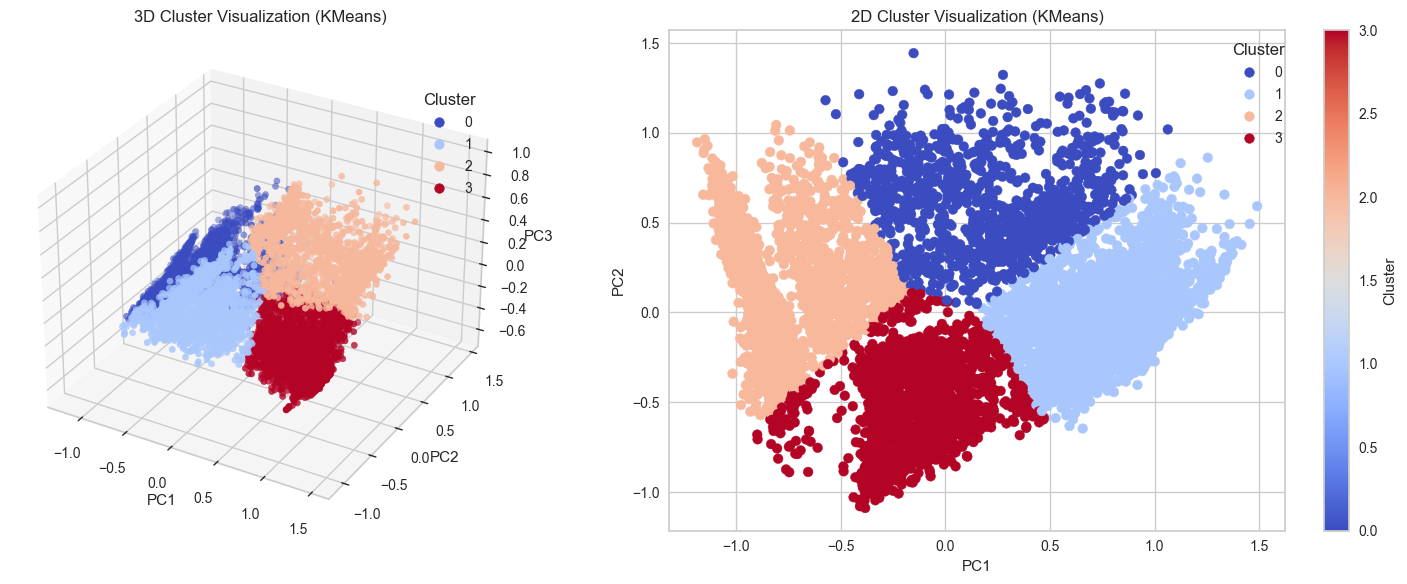

In [26]:
# Visualize your cluster in 2D or 3D to compare the result.
fig = plt.figure(figsize=(16, 6))
# 3D Cluster Visualization
ax1 = fig.add_subplot(121, projection='3d')
scatter_3d = ax1.scatter(
    pca_features_3D[:, 0],
    pca_features_3D[:, 1],
    pca_features_3D[:, 2],
    c=kmeans_labels_3D,
    cmap='coolwarm'
)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
ax1.set_title('3D Cluster Visualization (KMeans)')
legend_3d = ax1.legend(*scatter_3d.legend_elements(), title="Cluster", bbox_to_anchor=(0.8, 0.9))
ax1.grid(True)

# 2D Cluster Visualization
ax2 = fig.add_subplot(122)
scatter_2d = ax2.scatter(
    pca_features_2D[:, 0],
    pca_features_2D[:, 1],
    c=kmeans_labels_2D,
    cmap='coolwarm'
)
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('2D Cluster Visualization (KMeans)')
plt.colorbar(scatter_2d, ax=ax2, label='Cluster')
legend_2d = ax2.legend(*scatter_2d.legend_elements(), title="Cluster", bbox_to_anchor=(1.02, 1))
ax2.grid(True)
plt.tight_layout()
plt.show()

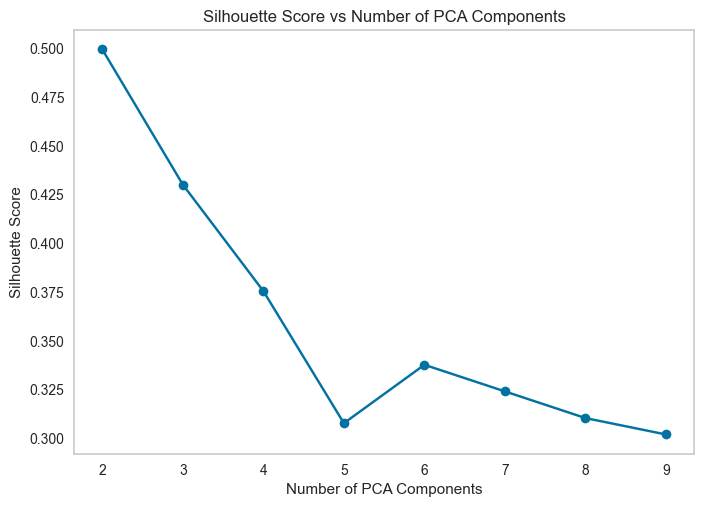

In [27]:
# Create many PCA features for kmeans clustering
silhouette_score_matrix = []
for i in range(2, 10):
    pca = PCA(n_components=i)
    pca_features = pca.fit_transform(scaled_data)
    kmeans.fit(pca_features)
    silhouette = silhouette_score(pca_features, kmeans.labels_)
    silhouette_score_matrix.append(silhouette)
    
# Plot silhouette scores for different PCA components
plt.figure()
plt.plot(range(2, 10), silhouette_score_matrix, marker='o')
plt.title('Silhouette Score vs Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 10))
plt.grid()
plt.show()

In [28]:
# Save the model
import pickle

with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# Discussion & Conclusion

In [29]:
def get_conclusion():
    return  "7. " \
            "Bộ dữ liệu Clustered_Customer_Data không được cân bằng và có hơi hướng lệch trái. " \
            "Phân phối của các biến số dự báo khá khác nhau, với một số biến có phân phối đồng đều và một số biến có phân phối lệch trái." \
            "Dữ liệu nhiễu được thay thế bằng trung vị của mỗi cluster, giúp làm sạch dữ liệu và cải thiện chất lượng dữ liệu." \
            "Ma trận tương quan giữa các biến cho thấy một số biến có tương quan mạnh với nhau, trong khi một số biến khác lại không có tương quan rõ rệt." \
            "Thêm các cột mới bằng log1p giúp làm giảm độ lệch của dữ liệu và cải thiện khả năng phân tích." \
            "Phương pháp Elbow cho thấy số lượng phân cụm tốt nhất là 3." \
            "Với việc giữ nguyên số chiều dữ liệu, thì DBSCAN là lựa chọn tốt nhất nhưng việc phân cụm vẫn chưa phải tối ưu." \
            "Khi sử dụng PCA để giảm chiều dữ liệu xuống 2, mô hình được phân cụm khá rõ ràng." \
            "Tuy nhiên, việc giảm chiều nhiều hơn không giúp mô hình tốt hơn." \
            "Để tối ưu bài toán phân cụm, chúng ta nên thu thập thêm dữ liệu mới và có tính thực tế." 